**Exercise 1:**

https://github.com/mnhwt0108/GaussQuadrature-Romberg/blob/main/Questions/1.png

Duong Minh Nhut - ITITWE19024

Answer   : 0.6023087613806573 
Time took: 0.000769


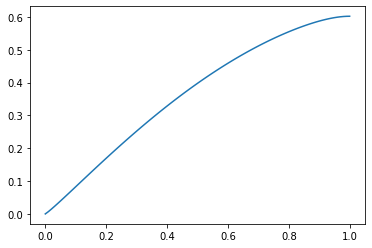

In [113]:
import math
import matplotlib.pyplot as plt
from __future__ import division
from pylab import *
from scipy.special.orthogonal import p_roots

# define the function
f = lambda x: (x**0.1)*(1.2-x)*(1-np.exp(20*(x-1)))

def gauss(f,n,a,b):
    [x,w] = p_roots(n+1)
    G=0.5*(b-a)*sum(w*f(0.5*(b-a)*x+0.5*(b+a)))
    return G

def plotY(arr):
  y_sol = []
  for i in range (len(arr)):
    temp = gauss(f,50, 0.0, arr[i])
    y_sol.append(temp)
  return y_sol

x = np.linspace(0,1,100)
y = plotY(x)

print("Duong Minh Nhut - ITITWE19024")
starttime = timeit.default_timer()
print("\nAnswer   :",gauss(f,50,0,1),"\nTime took: %f" %(timeit.default_timer()-starttime))
plt.plot(x,y)



**Coding and explaination:**



Step 1: import libaries

Step 2: define the given function



Step 3: define gauss function to calculated the value


*   input : function, number of terms, lower limit, upper limit
*   output : final result





Step 4: define plotY function to get all the calculated solutions for ploting


*   input : arr
*   output: y_sol



Step 5: define the x axis and call plotY to get y axis of graph

Step 6: call the function to calculate the answer, print out the results and plot the graph



**Assessment:**

From the result, it seems that the value calculated is not that far off from the true value given in the exercise


> Calculated : 0.602308

> Given : 0.602298

> Difference: 0.0016603%

And the time it took for calculation to be done is less than one of a tenth of a second

> Time took: 0.000769

Also, from the graph, we can see that the y value continously increases









**Exercise 2:**
https://github.com/mnhwt0108/GaussQuadrature-Romberg/blob/main/Questions/1.png

Duong Minh Nhut - ITITWE19024

[[0.05577192 0.         0.         0.         0.        ]
 [0.58799048 0.76539667 0.         0.         0.        ]
 [1.01528097 1.15771114 1.18386544 0.         0.        ]
 [1.17060691 1.22238223 1.22669363 1.22737345 0.        ]
 [1.21358361 1.22790918 1.22827764 1.22830278 1.22830643]] 
Time took: 0.000217

Solution from recursive: 1.2283064284164116 
Time took: 0.000306 




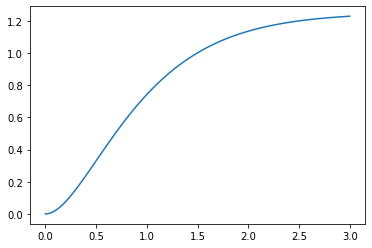

In [114]:
import math
import numpy as np
import matplotlib.pyplot as plt

#function

f = lambda x: 5*x*np.exp(-2*x)

#Trapezoidal function to apply in Romberg
def Trap(a,b,n):
  h = (b-a)/n
  s = 0
  for i in range (n-1):
    s+=f(a+h*(i+1))
  return h/2*(f(a)+2*s+f(b))

#Recursive Romberg function to print out only the last result
def reRomberg(k,j,a,b):
  if k == 1:
    return Trap(a,b,2**(j-1))
  else:
    return (4**(k-1)*reRomberg(k-1,j+1,a,b)-reRomberg(k-1,j,a,b))/(4**(k-1)-1)

order = 5
#create matrix of zeros size order X order
rom = np.zeros((order,order))

#non-recursive Romberg function to print out the result table
def Romberg(arr):
  for i in range(order):
    arr[i,0] = Trap(0,3,2**i)

  for i in np.arange(1,order):
    for j in np.arange(i,order):
      arr[j,i] = rom[j,i-1] + (rom[j,i-1] - rom[j-1,i-1])/(4**i-1)
  return arr

#function to get y-axis
def plotRom(arr):
  y_sol = []
  for i in range (len(arr)):
    temp = reRomberg(5,1,0,arr[i])
    y_sol.append(temp)
  return y_sol

#graph x and y axis
x = np.linspace(0,3,100)
y = plotRom(x)

print("Duong Minh Nhut - ITITWE19024\n")
starttime = timeit.default_timer()
print(Romberg(rom), "\nTime took: %f" %(timeit.default_timer()-starttime))
starttime2 = timeit.default_timer()
print("\nSolution from recursive:",reRomberg(5,1,0,3), "\nTime took: %f" %(timeit.default_timer()-starttime2),"\n\n")
plt.plot(x,y)



**Coding and explaination:**



Step 1: import libaries

Step 2: define the given function

Step 3: define trap function to use in Romberg function

*   input : lower limit, upper limit, number of terms
*   output : final result

Step 4: define reRomberg function (recursive Romberg)

*   input : k(as iteration), j(as rows of the table), lower limit, upper limit
*   output : final result

Step 5: define Romberg function to print out the result table in an matrix array

*   input : arr (take in a defined array (rom))
*   output: arr


Step 6: define plotRom function to get all the calculated solutions for ploting

*   input : arr
*   output: y_sol

Step 7: define the x axis and call plotY to get y axis of graph

Step 8: call the function to calculate the answer, print out the results and plot the graph



**Assessment:**

From the result, it seems that the value calculated is around

> Calculated from recursive : 1.2283064284164116

> Calculated from non-recursive : 1.22830643


And the time it took for calculation to be done is less than one of a tenth of a second

> Time took for recursive : 0.000306

> Time took for non-recursive : 0.000217

Also, from the graph, we can see that the y value continously increases
